In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam, Adagrad
from keras.callbacks import ModelCheckpoint, TerminateOnNaN, TensorBoard,ReduceLROnPlateau
from imutils import paths
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import argparse
import random
import pickle
import cv2
import os
import copy
import sys 
import keras
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [ ]:
!unzip batch1.zip
!unzip batch2.zip
!unzip batch3.zip
!unzip batch4.zip
!unzip batch5.zip

Archive:  batch1.zip
   creating: batch1/
  inflating: batch1/batch1_label.npy  
  inflating: batch1/batch1_train.npy  
Archive:  batch2.zip
   creating: batch2/
  inflating: batch2/batch2_train.npy  
  inflating: batch2/batch2_label.npy  
Archive:  batch3.zip
   creating: batch3/
  inflating: batch3/batch3_label.npy  
  inflating: batch3/batch3_train.npy  
Archive:  batch4.zip
   creating: batch4/
  inflating: batch4/batch4_train.npy  
  inflating: batch4/batch4_label.npy  
Archive:  batch5.zip
   creating: batch5/
  inflating: batch5/batch5_label.npy  
  inflating: batch5/batch5_train.npy  


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (250, 250, 3),  
include_top = False,  
weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = keras.layers.Flatten()(base_model.output) 
x = keras.layers.Dense(512, activation='relu')(x) 
x = keras.layers.Dropout(0.5)(x) 
x = keras.layers.Dense(9, activation='softmax')(x)
model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
n ="1"
x = np.load("batch{}/batch{}_train.npy".format(n,n))
y_l = np.load("batch{}/batch{}_label.npy".format(n,n))

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y_l.reshape(-1,1)).toarray()

[0. 0. 0. 1. 0. 0. 0. 0. 0.]
cake


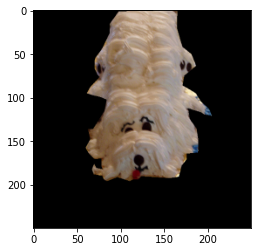

In [ ]:
no = 10
plt.imshow(x[no])
print(y[no])
print(y_l[no])

In [ ]:
model.fit(x, y, validation_split= 0.1, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 10s 99ms/step - loss: 0.3093 - acc: 0.3342 - val_loss: 0.2829 - val_acc: 0.3731
Epoch 2/10
100/100 [==============================] - 8s 82ms/step - loss: 0.2444 - acc: 0.4736 - val_loss: 0.2375 - val_acc: 0.5115
Epoch 3/10
100/100 [==============================] - 8s 82ms/step - loss: 0.2145 - acc: 0.5553 - val_loss: 0.2360 - val_acc: 0.4577
Epoch 4/10
100/100 [==============================] - 8s 82ms/step - loss: 0.1930 - acc: 0.5988 - val_loss: 0.2256 - val_acc: 0.5462
Epoch 5/10
100/100 [==============================] - 8s 82ms/step - loss: 0.1771 - acc: 0.6269 - val_loss: 0.2389 - val_acc: 0.4538
Epoch 6/10
100/100 [==============================] - 8s 82ms/step - loss: 0.1628 - acc: 0.6604 - val_loss: 0.2313 - val_acc: 0.5269
Epoch 7/10
100/100 [==============================] - 8s 82ms/step - loss: 0.1500 - acc: 0.6922 - val_loss: 0.2565 - val_acc: 0.4885
Epoch 8/10
100/100 [==============================] - 8s 82ms/step -

In [ ]:
n ="2"
x = np.load("batch{}/batch{}_train.npy".format(n,n))
y_l = np.load("batch{}/batch{}_label.npy".format(n,n))

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y_l.reshape(-1,1)).toarray()

[0. 0. 0. 0. 0. 0. 0. 1. 0.]
pizza


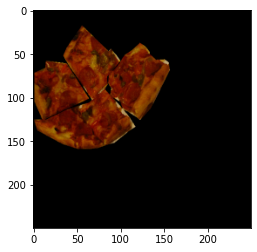

In [ ]:
no = 27
plt.imshow(x[no])
print(y[no])
print(y_l[no])

In [ ]:
model.fit(x, y, validation_split= 0.1, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 9s 94ms/step - loss: 0.2408 - acc: 0.5115 - val_loss: 0.2196 - val_acc: 0.5560
Epoch 2/10
100/100 [==============================] - 8s 81ms/step - loss: 0.2090 - acc: 0.5647 - val_loss: 0.2073 - val_acc: 0.6040
Epoch 3/10
100/100 [==============================] - 8s 81ms/step - loss: 0.1956 - acc: 0.5900 - val_loss: 0.2155 - val_acc: 0.5840
Epoch 4/10
100/100 [==============================] - 8s 81ms/step - loss: 0.1783 - acc: 0.6200 - val_loss: 0.2110 - val_acc: 0.6160
Epoch 5/10
100/100 [==============================] - 8s 81ms/step - loss: 0.1708 - acc: 0.6466 - val_loss: 0.2044 - val_acc: 0.6000
Epoch 6/10
100/100 [==============================] - 8s 81ms/step - loss: 0.1572 - acc: 0.6710 - val_loss: 0.2070 - val_acc: 0.6200
Epoch 7/10
100/100 [==============================] - 8s 81ms/step - loss: 0.1502 - acc: 0.6985 - val_loss: 0.2236 - val_acc: 0.5760
Epoch 8/10
100/100 [==============================] - 8s 81ms/step - 

In [ ]:
n ="3"
x = np.load("batch{}/batch{}_train.npy".format(n,n))
y_l = np.load("batch{}/batch{}_label.npy".format(n,n))

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y_l.reshape(-1,1)).toarray()

[0. 0. 1. 0. 0. 0. 0. 0. 0.]
broccoli


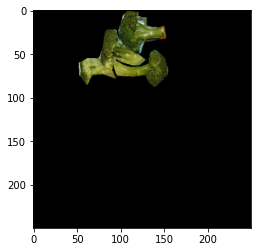

In [ ]:
no = 15
plt.imshow(x[no])
print(y[no])
print(y_l[no])

In [ ]:
model.fit(x, y, validation_split= 0.1, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 8s 82ms/step - loss: 0.2238 - acc: 0.5438 - val_loss: 0.2216 - val_acc: 0.5200
Epoch 2/10
100/100 [==============================] - 8s 81ms/step - loss: 0.2045 - acc: 0.5673 - val_loss: 0.2064 - val_acc: 0.5560
Epoch 3/10
100/100 [==============================] - 8s 81ms/step - loss: 0.1862 - acc: 0.6105 - val_loss: 0.2173 - val_acc: 0.5280
Epoch 4/10
100/100 [==============================] - 8s 81ms/step - loss: 0.1764 - acc: 0.6366 - val_loss: 0.2123 - val_acc: 0.5520
Epoch 5/10
100/100 [==============================] - 8s 81ms/step - loss: 0.1669 - acc: 0.6427 - val_loss: 0.2204 - val_acc: 0.5320
Epoch 6/10
100/100 [==============================] - 8s 81ms/step - loss: 0.1571 - acc: 0.6780 - val_loss: 0.2162 - val_acc: 0.5160
Epoch 7/10
100/100 [==============================] - 8s 81ms/step - loss: 0.1435 - acc: 0.6976 - val_loss: 0.2334 - val_acc: 0.5040
Epoch 8/10
100/100 [==============================] - 8s 81ms/step - 

In [ ]:
n ="4"
x = np.load("batch{}/batch{}_train.npy".format(n,n))
y_l = np.load("batch{}/batch{}_label.npy".format(n,n))

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y_l.reshape(-1,1)).toarray()

[0. 0. 0. 0. 1. 0. 0. 0. 0.]
donut


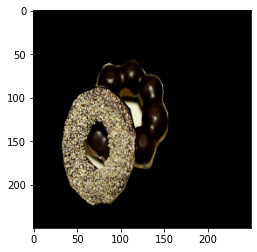

In [ ]:
no = 15
plt.imshow(x[no])
print(y[no])
print(y_l[no])

In [ ]:
history = model.fit(x, y, validation_split= 0.1, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 10s 103ms/step - loss: 0.2083 - acc: 0.5828 - val_loss: 0.1897 - val_acc: 0.6324
Epoch 2/10
100/100 [==============================] - 9s 89ms/step - loss: 0.1877 - acc: 0.6181 - val_loss: 0.1750 - val_acc: 0.6471
Epoch 3/10
100/100 [==============================] - 9s 89ms/step - loss: 0.1756 - acc: 0.6366 - val_loss: 0.1739 - val_acc: 0.6471
Epoch 4/10
100/100 [==============================] - 9s 89ms/step - loss: 0.1638 - acc: 0.6654 - val_loss: 0.1778 - val_acc: 0.6265
Epoch 5/10
100/100 [==============================] - 9s 89ms/step - loss: 0.1550 - acc: 0.6880 - val_loss: 0.1800 - val_acc: 0.6294
Epoch 6/10
100/100 [==============================] - 9s 89ms/step - loss: 0.1477 - acc: 0.6987 - val_loss: 0.1847 - val_acc: 0.6412
Epoch 7/10
100/100 [==============================] - 9s 89ms/step - loss: 0.1390 - acc: 0.7197 - val_loss: 0.1879 - val_acc: 0.6412
Epoch 8/10
100/100 [==============================] - 9s 89ms/step 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


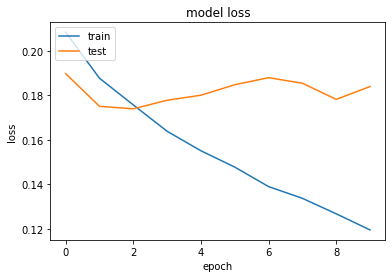

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

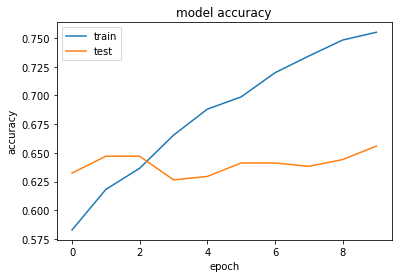

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
n ="5"
x = np.load("batch{}/batch{}_train.npy".format(n,n))
y_l = np.load("batch{}/batch{}_label.npy".format(n,n))

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y_l.reshape(-1,1)).toarray()

[0. 0. 0. 0. 1. 0. 0. 0. 0.]
donut


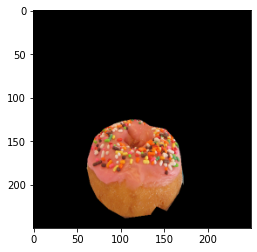

In [ ]:
no = 101
plt.imshow(x[no])
print(y[no])
print(y_l[no])

In [ ]:
import time
start_time = time.time()
loss, accuracy = model.evaluate(x, y, verbose=1)
end_time = time.time() - start_time

63/63 [==============================] - 5s 77ms/step - loss: 0.1879 - acc: 0.6295


In [ ]:
print("total time: "+str(end_time))

total time: 5.4670000076293945


In [ ]:
loss

0.18793272972106934

In [ ]:
accuracy

0.6294999718666077

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y_l2 = label.fit_transform(y_l)

In [ ]:
print(classification_report(y_l2, np.argmax(model.predict(x),axis=1)))

              precision    recall  f1-score   support

           0       0.30      0.68      0.42       164
           1       0.88      0.57      0.69       268
           2       0.92      0.66      0.77       187
           3       0.54      0.65      0.59       283
           4       0.50      0.41      0.45       157
           5       0.53      0.37      0.43       166
           6       0.97      0.97      0.97       212
           7       0.84      0.72      0.77       328
           8       0.51      0.51      0.51       235

    accuracy                           0.63      2000
   macro avg       0.66      0.62      0.62      2000
weighted avg       0.69      0.63      0.64      2000



In [ ]:
import cv2   
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('banana.jpg')
img = cv2.resize(img, (250,250))
img = img[:, :, :3]
img.shape
img = img.reshape(1,250,250,3)
img = img / 255

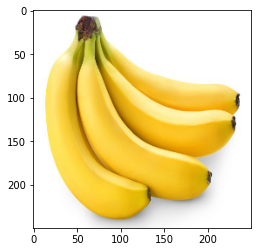

In [ ]:
plt.imshow(img[0])

In [ ]:
import time
start_time = time.time()
class_list = ["apple", "banana", "brocoli", "cake", "donut", "orange", "other", "pizza", "sandwich"]
y_proba = model.predict(img)  
end_time = time.time() - start_time
index = np.argmax(y_proba[0])
print("class is {name}".format(name = class_list[index]))
print(y_proba)
print("total time: "+str(end_time))

class is banana
[[1.6392286e-07 9.9999917e-01 2.9780639e-15 4.4290317e-08 3.2530648e-10
  2.8050732e-07 3.7968749e-07 6.6433214e-13 4.0489873e-12]]
total time: 0.04228520393371582


In [ ]:
model.save("model_final")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_final/assets


In [ ]:
!zip -r /content/model_final.zip /content/model_final

  adding: content/model_final/ (stored 0%)
  adding: content/model_final/variables/ (stored 0%)
  adding: content/model_final/variables/variables.index (deflated 67%)
  adding: content/model_final/variables/variables.data-00000-of-00001 (deflated 16%)
  adding: content/model_final/saved_model.pb (deflated 91%)
  adding: content/model_final/assets/ (stored 0%)
